In [10]:
import seaborn as sns
import pandas as pd


data = pd.read_csv(r'C:\Users\hemah\OneDrive\Desktop\ML Assignment\tested.csv')

print(data.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [11]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


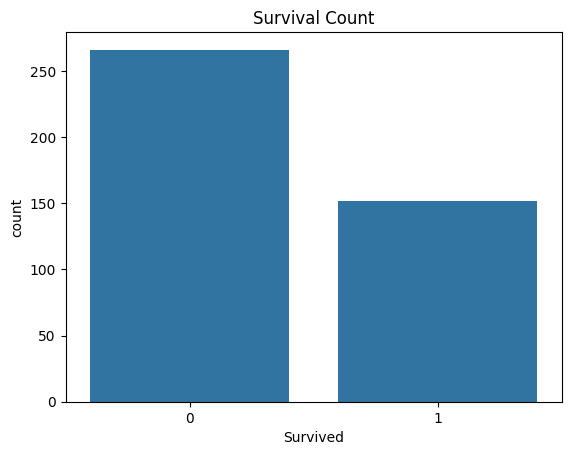

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data=data)
plt.title('Survival Count')
plt.show()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


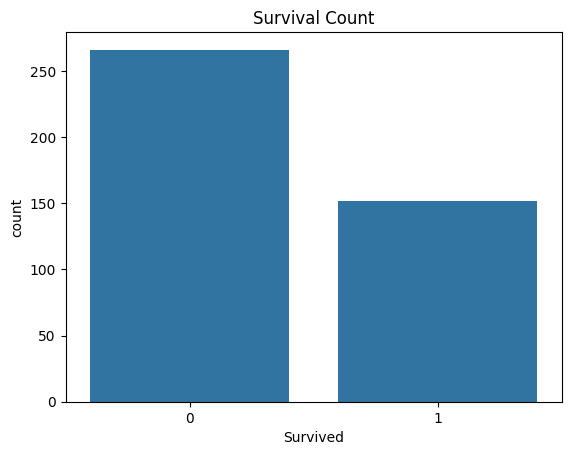

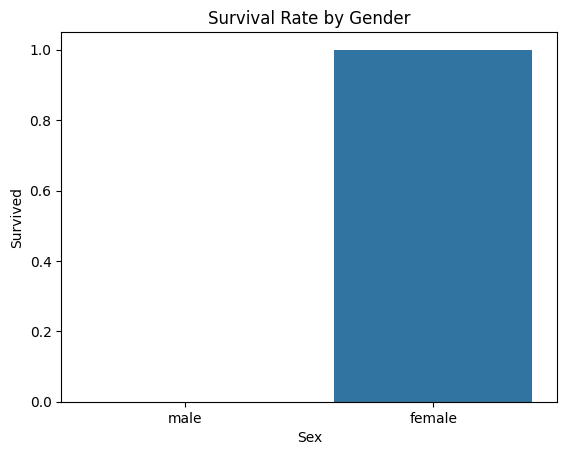

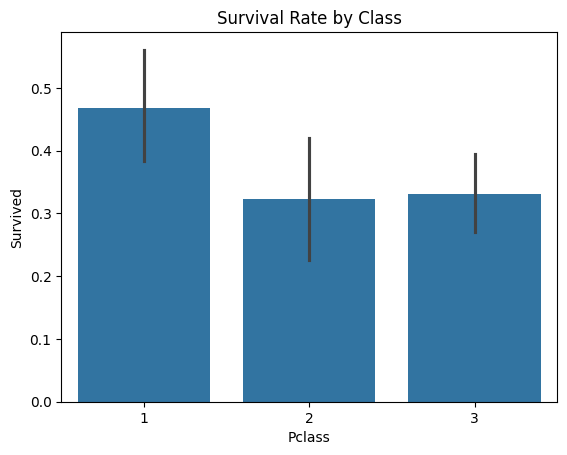

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.isnull().sum())

sns.countplot(x="Survived", data=data)
plt.title('Survival Count')
plt.show()

sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())  

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
336       2  32.0      0      0  13.0000      True       False        True
31        2  24.0      2      0  31.5000      True       False        True
84        2  27.0      0      0  10.7083      True        True       False
287       1  24.0      1      0  82.2667      True       False        True
317       2  19.0      0      0  10.5000      True       False        True


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

best_y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
print(f"Best Model Accuracy: {best_accuracy * 100:.2f}%")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 1.0
Best Model Accuracy: 100.00%


In [16]:
import joblib

In [17]:
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

In [18]:
import streamlit as st
import joblib
import pandas as pd

# Load the pre-trained model
def load_model():
    model = joblib.load('titanic_model.pkl')
    return model

# Define Streamlit app
st.title("Titanic Survival Prediction App")

# Input fields for user input
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 100, 30)
sibsp = st.number_input('Number of Siblings/Spouses', min_value=0, max_value=8, value=0)
parch = st.number_input('Number of Parents/Children', min_value=0, max_value=6, value=0)
fare = st.number_input('Fare', min_value=0.0, max_value=500.0, value=50.0)
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

# Create DataFrame from user input
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex_male': [1 if sex == 'male' else 0],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0],
})

# Load the trained model
model = load_model()

# Make prediction
if st.button('Predict'):
    prediction = model.predict(input_data)
    if prediction == 1:
        st.success("The passenger survived.")
    else:
        st.error("The passenger did not survive.")


2024-09-17 18:46:10.749 
  command:

    streamlit run C:\Users\hemah\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-17 18:46:10.749 Session state does not function when running a script without `streamlit run`
